In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [670]:
# Importando os datasets
path = r"C:\Users\Eduarda\Documents\Data Analysis\ML"
df1 = pd.read_csv(path + "\LIFE.csv",delimiter=',')
df2 = pd.read_csv(path + "/PIB.csv",sep='delimiter',engine='python',delimiter=';')

In [671]:
df1.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [672]:
df1 = df1.loc[(df1['Indicator'] == 'Life satisfaction') & (df1['INEQUALITY'] == 'TOT')]

In [673]:
df2.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,255.288","1,270.216","1,319.902","1,253.906","1,304.063","1,363.060","1,424.397","1,481.497","1,540.937",2019.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,2.647,1.189,3.912,-5.000,4.000,4.524,4.500,4.009,4.012,2019.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,285.460","1,327.690","1,469.596","1,465.922","1,597.738","1,741.832","1,893.023","2,047.665","2,215.013",2019.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.910,18.401,18.876,19.006,19.692,20.829,22.022,23.169,24.372,2019.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,74.712,77.416,81.880,78.884,83.852,89.205,94.908,100.600,106.685,2019.0


In [674]:
df2 = df2.loc[(df2['Subject Descriptor'] == 'Gross domestic product per capita, current prices') & (df2['Units'] == 'U.S. dollars')]

In [675]:
df2.loc[df2['Country'] == 'Brazil']

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After
1044,223,BRA,NGDPDPC,Brazil,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,229.883",...,"9,974.814","9,043.237","8,751.381","6,450.451","6,728.166","7,299.091","7,736.761","8,252.807","8,690.040",2019.0


In [676]:
life = df1[['Country','Value']].copy()
pib = df2[['Country','2019']].copy()
pib_life = pd.merge(pib,life,how='left',on='Country')

In [677]:
pib_life.isnull().sum()

Country      0
2019         2
Value      155
dtype: int64

In [678]:
pib_life.dtypes

Country     object
2019        object
Value      float64
dtype: object

In [679]:
pib_life.rename(columns={'2019':'PIB per capita (2019)','Value':'Satisfação de vida'},inplace=True)

In [680]:
pib_life.dropna(subset=['PIB per capita (2019)'],inplace=True)

In [681]:
pib_life['PIB per capita (2019)'] = pib_life['PIB per capita (2019)'].apply(lambda x: x.replace(',','.'))
pib_life['PIB per capita (2019)'] = pib_life['PIB per capita (2019)'].apply(lambda x: x.replace('.',''))

In [682]:
pib_life['PIB per capita (2019)'] = pd.to_numeric(pib_life['PIB per capita (2019)'],errors='coerce')

In [683]:
pib_life.loc[pib_life['Country'] == 'Brazil']

,Country,PIB per capita (2019),Satisfação de vida
23,Brazil,8751381,6.4


In [684]:
pib_life.dropna(subset=['Satisfação de vida'],inplace=True)

In [685]:
pib_life.isnull().sum()

Country                  0
PIB per capita (2019)    0
Satisfação de vida       0
dtype: int64

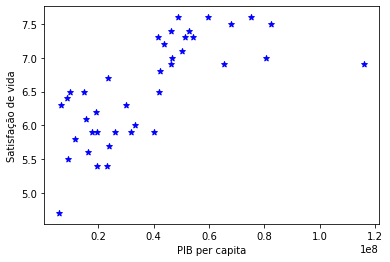

In [686]:
plt.scatter(x=pib_life['PIB per capita (2019)'],y=pib_life['Satisfação de vida'],color='blue',marker='*')
plt.xlabel('PIB per capita')
plt.ylabel('Satisfação de vida')
plt.show()

# Regressão Linear

In [687]:
X = np.c_[pib_life['PIB per capita (2019)']].copy()
y = np.c_[pib_life['Satisfação de vida']].copy()

In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [689]:
model = LinearRegression()

In [690]:
modelo = model.fit(X_train,y_train)

In [691]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [5.73317394]
(B) Inclinação:  [[2.04464792e-08]]


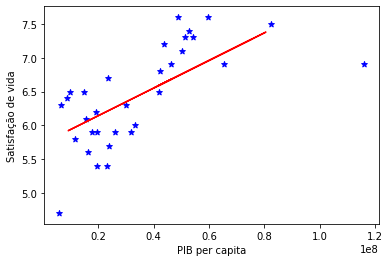

In [696]:
plt.scatter(X_train, y_train, color='blue',marker='*')
plt.plot(X_test, modelo.coef_[0][0]*X_test + modelo.intercept_[0], '-r')
plt.xlabel('PIB per capita')
plt.ylabel('Satisfação de vida')
plt.show()

In [667]:
predict = model.predict(X_test)
predict

array([[6.5562661 ],
       [7.37920557],
       [7.12061444],
       [6.58510993],
       [6.67926764],
       [6.68337546],
       [5.92027685],
       [7.2726799 ]])